# Introduction to Data Science
## Fitting models and overfitting  + using scripts




### Downloading & Installing Packages
There are some packages that will be required for this assignment that are no pre-loaded into Jupyter hub. You can install them following the instructions below.

Enter the following commands into jupyter's terminal one at a time:
```
sudo pip install liac-arff
sudo apt install graphviz
sudo pip install graphviz
sudo pip install pydotplus
```
enter "`Y`" when promted.

In [9]:
! sudo pip install pydotplus

The directory '/home/ubuntu/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/ubuntu/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 286kB 3.0MB/s ta 0:00:01
  Running setup.py install for pydotplus ... done


### Packages

In [10]:
# Import the libraries we will be using

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

from dstools import data_tools


# for plotting
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 10

### Scripts and Data

How can we use a script?  Let's use a script to create our artificial dataset, rather than putting the code into the notebook.  That way the code doesn't clutter up the notebook. I think about it this way: I use all sorts of Python functions, Pandas functions, and so on.  I don't care to have the code for how those functions work in my notebook.  And for the most part, I don't ever want to see that code, as long as I understand the functional (input->output) behavior (and any important side-effects).  

However, there are more important reasons to use such scripts--similar to the reasons for using other packages.  We can now use our new code across different notebooks.  Moreover, when we fix or improve the code in the script, it is fixed across all the notebooks.  

[Of course, with such power comes responsibility.  If the code is used across multiple notebooks, it is important to make sure that you keep the input/output functionality of the code the same, so we don't screw up something we did in a prior notebook.]

Take a look at the following:

* We use the folder **_dstools_** that is in the same directory (folder) as this notebook
* We import the file: **data\_tools**

This file is a   ".py" which has Python commands and functions:

1. Decision_Surface -- this is the function that visualizes the segmentation of the learned model
2. create_data -- this creates the artificial data set, for us to experiment with
3. X -- pulls out the features from the artificial data set just created

After the "import" we can use these 3 functions, just like we use pre-defined packages like Pandas.

In [11]:
# Get some data: The create_data() function returns 4 variables:
target_name, variable_names, data, Y = data_tools.create_data()

# Grab the predictors (rows and columns)
X = data_tools.X()

In [12]:
X

,humor,number_pets
0,2.082370,16.474498
1,1.819390,35.248403
2,3.373117,10.731196
3,2.312507,38.102902
4,2.970254,21.286599
5,0.271075,14.445886
6,-0.134271,1.801375
7,0.567423,19.050716
8,1.538977,13.144947
9,0.943247,13.983279


In [13]:
#Now put a portion of the data into a Pandas DataFrame to take a look at it
pd.DataFrame(list(zip(X.head(10)['humor'],X.head(10)['number_pets'],Y.head(10))),
             columns=['humor','number_pets','success'])

,humor,number_pets,success
0,2.082370,16.474498,0.0
1,1.819390,35.248403,0.0
2,3.373117,10.731196,0.0
3,2.312507,38.102902,0.0
4,2.970254,21.286599,0.0
5,0.271075,14.445886,0.0
6,-0.134271,1.801375,0.0
7,0.567423,19.050716,0.0
8,1.538977,13.144947,0.0
9,0.943247,13.983279,0.0


Let's take a look at our data visually, rather than as a table. 

When we have only two (numeric) features, a scatterplot using these as the axes represents the "space" of instances. We can visualize how the target is distributed by representing the target of each instance (point) with a different marker.  We will use color.


Our two features are `humor` and `number_pets`. We will visualize whether or not there seems to be a pattern of which users are `success`ful.

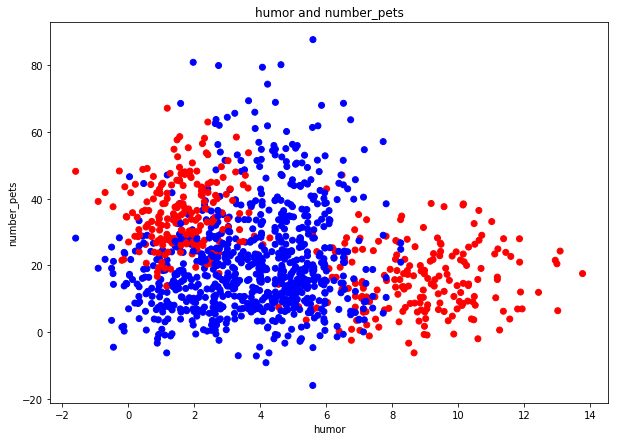

In [15]:
plt.figure(figsize=[10,7])
data_tools.Decision_Surface(X, Y, None, surface=False)

## Tree-structured models
Let's now re-explore the modeling technique we introduced last class -- tree-structured models.  And in particular, classification trees (since our target variable is categorical).

## Trees are non-linear models

If you experiment with the tree depth, you will see that you can fit the data better and better. Deeper trees produce chop the instance space into smaller and smaller pieces.  Try it above, using the `depths` variable.  (Will this finer and finer segmentation go on forever?)

**Extra:** Can you visualize the actual tree-structured model?  Hint: there's a function to do it in last week's notebook.

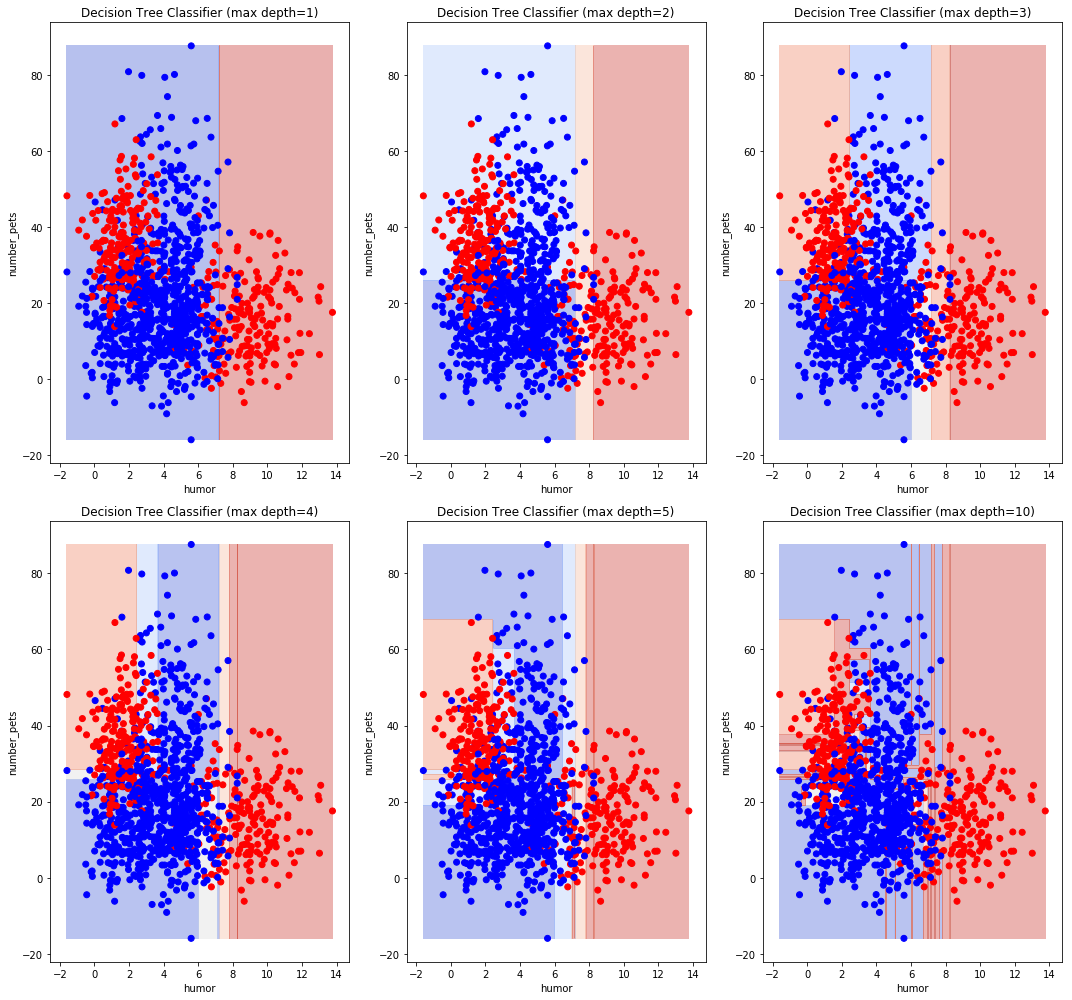

In [16]:
# Settings
depths = [1,2,3,4,5,10] 
show_probabilities = True


nrows = np.floor(np.sqrt(len(depths)))
ncol = 2 if len(depths) == 4 else 3
plt.figure(figsize=[15,7*nrows])

position = 1
for depth in depths:

    # Model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, Y) 
    
    # Plot

    plt.subplot(nrows, ncol, position)
    position += 1
    data_tools.Decision_Surface(X, Y, model, probabilities=show_probabilities)
    plt.title("Decision Tree Classifier (max depth=" + str(depth) + ")")
    
plt.tight_layout()
plt.show()


## Linear discriminant models

Chapter 4 introduces linear models.  Let's try building one on this data set. 

Looking at the data (see scatterplot above), can you estimate by eye where a good linear discriminant would be?

We will build a **Logistic regression** model. You can also find logistic regression modeling in the sklearn package.

If you remember, linear regression looks like this:

$$ y = b + a_1 x_1 + a_2 x_2 + a_3 x_3 + ... $$

If you are estimating the probability between two different classes, traditional linear regression may not work as well as you hope. Probabilities need to be bounded between zero and one. To solve this problem, a common tool is to use a logistic regression model.

Let's plot a linear regression curve to see what it looks like.

In [ ]:
# Generate data with the "datasets" function from SKLEARN (package)
# This function returns two variables: predictors and target

n_samples = 100
predictors, target = datasets.make_classification(n_features=1, n_redundant=0, 
                                                  n_informative=1, n_clusters_per_class=1,
                                                  n_samples=n_samples)
x = predictors
y = target

# Model
model_lin = LinearRegression()
model_lin.fit(x,y)

y_lin = model_lin.predict(x)



model_log = LogisticRegression()
model_log.fit(x, y)
y_hat = model_log.predict_proba(x)[:,1]

# plotting
plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
plt.plot(x,y_lin,'r')
plt.scatter(x,y)
acc = model_lin.score(x,y)
acc = np.sqrt( sum((np.array(y)-np.array(y_lin))**2)/n_samples) # calculates Root mean square error

plt.title("Prediction: Linear fit. Error = " + str(round(acc,2)))

plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.scatter(x,y_hat)
#plt.plot(x,y_hat,'orange')
#plt.scatter(x,y_hat)
acc2 = np.sqrt( sum((np.array(y)-np.array(y_hat))**2)/n_samples) # calculates Root mean square error
plt.title("Prediction: Logistic fit. Error = " + str(round(acc2,2)))


First let's see what linear regression looks like on a new data set with two attributes.

In [ ]:
# Generate data
np.random.seed(3)
predictors, target = datasets.make_classification(n_features=2, n_redundant=0, 
                                                  n_informative=2, n_clusters_per_class=2,
                                                  n_samples=300)

variable_names = ["humor", "number_pets"]
target_name = "success"
data = pd.DataFrame(predictors, columns=variable_names)

# Build model
# Model
model = LogisticRegression()
model.fit(predictors, target)

# Plot
data_tools.Decision_Surface(data, target, model = model, probabilities=False)

Now let's try it again with our original data.

In [ ]:
# Settings
show_probabilities = False

# Model
model = LogisticRegression()
model.fit(X, Y)

# Plot
plt.figure(figsize=[10,7])
data_tools.Decision_Surface(X, Y, model, probabilities=show_probabilities)
plt.title("Linear model")
plt.tight_layout()
plt.show()



In this case the two classes do not appear to be linearly separable, resulting in a poor training accuracy.

In [ ]:
accuracy = model.score(X,Y)
print('Training Accuracy: ' + str(accuracy))

## Estimating Probabilities

Ok.  For many business problems, we don't need just to estimate the categorical target variable, but we want to estimate the probability that a particular value will be taken.  Just about every classification model can also tell you the estimated probability of class membership.  

Intuitively, how would you generate probabilities from a classification tree?  From a linear discriminant? 

Let's go back and look at the probabilities estimated by these models. You can visualize the probabilities both for the linear model and the tree-structured model. You can do this by modifying the settings at the top of each code block above **(`show_probabilities = True` or `False`)**.

## Non-linear models

We saw that tree-structured models can fit the data very well.  It seems like a linear model possibly cannot.  Can we use the idea of fitting linear models to generate non-linear boundaries with **logistic regression**? 

Yes! We can do this by adding non-linear features, such as $humor^2$ or $humor^3$. 

_** This is one of the most common ways of introducing non-linearity into numeric function modeling: use a linear function learner, but introduce non-linear features.**_

In [ ]:
# Settings
max_order = 3  # Maximum of 3 was created in the script:  data_tools.py

show_probabilities = True

nrows = np.floor(np.sqrt(max_order))
ncol = 2 if max_order == 4 else 3
plt.figure(figsize=[15,7*nrows])

for order in range(1, max_order+1):
    # Get a dataset X_complex with non linear variables
    X_complex = data_tools.X(order)
    
    # Model used to predict
    model = LogisticRegression(penalty='l2')
    model.fit(X_complex, Y)
    
    # Plot and calculate accuracy
    plt.subplot(nrows, ncol, order)
    data_tools.Decision_Surface(X_complex, Y, model, probabilities=show_probabilities)
    acc_value = metrics.accuracy_score(model.predict(X_complex), Y) 
    plt.title("Linear model " + str(order) + "-order (accuracy: "+ str(round(acc_value,3))+")")
    
plt.tight_layout()
plt.show()

***

So, what does the data look like with the non-linear features? 

In [ ]:
X_complex.tail()

## Regularization
There are a few ways to decrease the complexity of regression models. One common way is called **regularization**. Regularization decreases model complexity and brings predictions closer to the "average" value of the data set by decreasing the weights on the coefficients.

In [ ]:
# Show probabilities?
show_probabilities = False

# Array of penalty values
penalties = [1,2,3,5]
penalty_type = "l1"

# set tne number of rows and columns for the plots
ncol = 2
nrows = np.ceil(len(penalties)/ncol)
plt.figure(figsize=[15,7*nrows])

idx = 1 # index value (used for arranging the plots)
for inv_penalty in penalties:
    # Get a dataset X_complex with non linear variables
    X_complex = data_tools.X(max_order)
    
    # Model used to predict
    model = LogisticRegression(penalty=penalty_type,C=10**(-inv_penalty))
    model.fit(X_complex, Y)
    
    # Plot and calculate accuracy

    plt.subplot(nrows, ncol,idx)
    idx = idx +1
    data_tools.Decision_Surface(X_complex, Y, model, probabilities=show_probabilities)
    acc_value = metrics.accuracy_score(model.predict(X_complex), Y) 
    plt.title("Linear model " + str(order) + "-order, "+penalty_type.upper()+" penalty: 10^"+str(inv_penalty)+"  (accuracy: "+ str(round(acc_value,3))+")")
    
plt.tight_layout()
plt.show()

Which model is better in this case?? Look at the **accuracy** of each one.   Accuracy is simply the count of correct decisions divided by the total number of decisions.

[From sklearn documentation on sklearn.metrics.accuracy_score: "In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true."  [More about the accuracy measure..](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)]

Of course, we can also look at the **probabilities** on these non-linear surfaces. Try it out above!

## Generalization

Our evaluation above actually was not what we really want.

What we want are models that **generalize** to data that were not used to build them! In other words, we want this model to be able to predict the target for new data instances! Do we know how well our models generalize? Why is this important?

<img src="images/generalization.png" alt="Drawing" style="width: 600px;"/>


Let's apply this concept to our data. Now, before we fit out models, we set aside some data to be used later for testing ('holdout data').  This allows us to assess whether the model simply fit the training dataset well, or whether it truly fit some regularities in the domain. 

Let's use sklearn to set aside some randomly selected holdout data.

In [ ]:
# Set randomness so that we all get the same answer
np.random.seed(842)

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80)

Now that we have split our data, let's revisit the tree-structured classifier. Let's check how well a model does when it is fit on a training set and then used to predict on both the training set as well as our holdout set. Remember, the model has never seen this holdout "test" set before!

In [ ]:
# Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(model.predict(X_test), Y_test) )

The results on the test set were worse. Why is this? Can it ever do beter?

What happens as our tree gets more and more complicated?  (Deeper and deeper.)

In [ ]:
accuracies_train = []
accuracies_test = []
maxdepth = 20
depths = range(1, maxdepth+1)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    
    accuracies_train.append(metrics.accuracy_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.accuracy_score(model.predict(X_test), Y_test))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performance on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_test), 1.0])
plt.xlim([1,maxdepth])
plt.legend()
plt.grid()
plt.show()


## Cross validation

Above, we made a single train/test split. We set aside 20% of our data and *never* used it for training. We also never used the 80% of the data set aside for training to test generalizability.  Although this is far better than testing on the training data, which does not measure generalization performance at all, there are two potential problems with the simple holdout approach.

1) Perhaps the random split was particularly bad (or good).  Do we have any confidence in our accuracy estimate?

2) We are using only 20\% of the data for testing.  Could we possibly use the data more fully for testing?

Instead of only making the split once, let's use "cross-validation" -- every record will contribute to testing as well as to training.


<img src="images/cross.png" alt="Drawing" style="width: 600px;"/>


In [ ]:
# Model
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, Y_train)

print ( "Cross validation accuracy on training = %.3f" % np.mean(cross_val_score(model, X, Y)) )

We can add this to our plot from above.

In [ ]:
accuracies_cross_validation = []
depths = range(1, 21)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    
    accuracies_cross_validation.append(np.mean(cross_val_score(model, X, Y,cv=10)))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performace on train and test data")
plt.plot(depths, accuracies_cross_validation, label="Cross Validation")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_cross_validation) , 1.0])
plt.xlim([1,20])
plt.legend()
plt.grid()
plt.show()

Why might the cross valdation score be so much higher than the train and test scores?